In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
#Load the Dataset
df = pd.read_csv("D:\\download1\\HR_Analytics.csv")

In [3]:
#Data Exploration
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())  # Checking for missing values

   EmpID  Age AgeGroup Attrition     BusinessTravel  DailyRate  \
0  RM297   18    18-25       Yes      Travel_Rarely        230   
1  RM302   18    18-25        No      Travel_Rarely        812   
2  RM458   18    18-25       Yes  Travel_Frequently       1306   
3  RM728   18    18-25        No         Non-Travel        287   
4  RM829   18    18-25       Yes         Non-Travel        247   

               Department  DistanceFromHome  Education EducationField  ...  \
0  Research & Development                 3          3  Life Sciences  ...   
1                   Sales                10          3        Medical  ...   
2                   Sales                 5          3      Marketing  ...   
3  Research & Development                 5          2  Life Sciences  ...   
4  Research & Development                 8          1        Medical  ...   

   RelationshipSatisfaction  StandardHours  StockOptionLevel  \
0                         3             80                 0   
1     

In [4]:
#Handling Missing Values
df.fillna(df.median(), inplace=True)  # Filling missing values with median

C:\Users\Welcome\AppData\Local\Temp\ipykernel_10300\1729942071.py:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.median(), inplace=True)  # Filling missing values with median


In [5]:
#Data Preprocessing
# Identifying object (categorical) columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical Columns:", categorical_cols)  # Debugging step

# Encoding categorical variables
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))  # Ensure values are strings before encoding
    label_encoders[col] = le

# Dropping irrelevant columns
drop_cols = ['EmpID', 'EmployeeNumber', 'Over18', 'StandardHours', 'EmployeeCount']
df.drop(columns=[col for col in drop_cols if col in df.columns], inplace=True)

# Check if any non-numeric columns remain
print(df.dtypes)  # Debugging step

Categorical Columns: ['EmpID', 'AgeGroup', 'Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'SalarySlab', 'Over18', 'OverTime']
Age                           int64
AgeGroup                      int32
Attrition                     int32
BusinessTravel                int32
DailyRate                     int64
Department                    int32
DistanceFromHome              int64
Education                     int64
EducationField                int32
EnvironmentSatisfaction       int64
Gender                        int32
HourlyRate                    int64
JobInvolvement                int64
JobLevel                      int64
JobRole                       int32
JobSatisfaction               int64
MaritalStatus                 int32
MonthlyIncome                 int64
SalarySlab                    int32
MonthlyRate                   int64
NumCompaniesWorked            int64
OverTime                      int32
PercentSalaryHike           

In [6]:
# Splitting the Dataset
X = df.drop(columns=['Attrition'])  # Features
y = df['Attrition']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)  # Changed test size to 20%

In [7]:
# Model Training
clf = RandomForestClassifier(
    n_estimators=100, 
    max_depth=10,  # Restrict tree depth
    min_samples_split=10,  # Minimum samples needed to split a node
    min_samples_leaf=5,  # Minimum samples required in leaf node
    class_weight='balanced',  # Handle class imbalance
    random_state=42
)

clf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

In [8]:
# Model Evaluation
y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8581081081081081

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92       248
           1       0.61      0.35      0.45        48

    accuracy                           0.86       296
   macro avg       0.75      0.65      0.68       296
weighted avg       0.84      0.86      0.84       296


Confusion Matrix:
 [[237  11]
 [ 31  17]]


In [9]:
# Decode categorical columns back to original labels
df['Department'] = label_encoders['Department'].inverse_transform(df['Department'])
df['JobRole'] = label_encoders['JobRole'].inverse_transform(df['JobRole'])

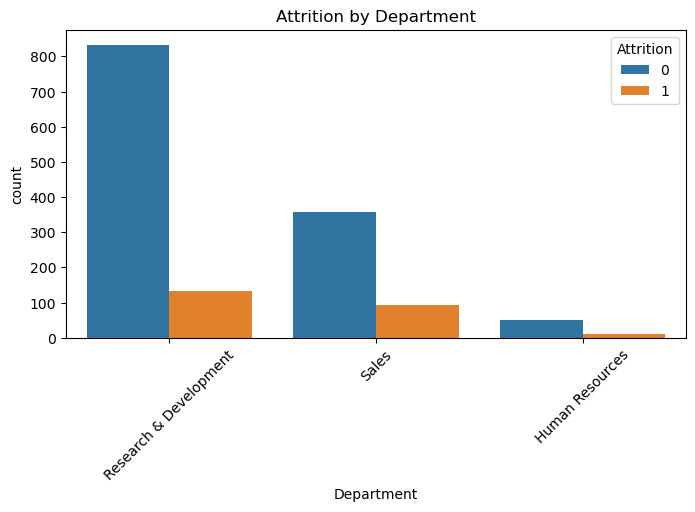

In [10]:
#Attrition Rate by Department
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Department', hue='Attrition')
plt.title("Attrition by Department")
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()

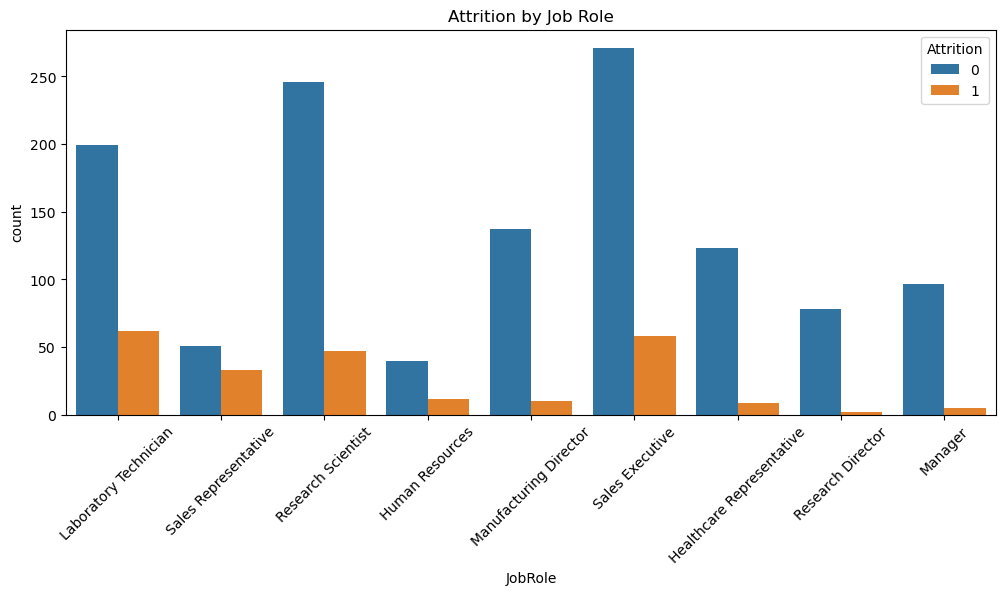

In [11]:
## Step 10: Attrition Rate by Job Role
plt.figure(figsize=(12, 5))
sns.countplot(x=df['JobRole'], hue=df['Attrition'])
plt.title("Attrition by Job Role")
plt.xticks(rotation=45)
plt.show()

In [12]:
#Checking
import pandas as pd

# Select a few random samples from the test set
sample_data = X_test.sample(5, random_state=None)  # Ensures different samples each time

# Make predictions for these samples
sample_predictions = clf.predict(sample_data)

# Decode categorical values for readability
sample_data_decoded = sample_data.copy()
for col in ['Department', 'JobRole']:  # Decode only categorical columns
    sample_data_decoded[col] = label_encoders[col].inverse_transform(sample_data[col])

# Convert results into a readable format
sample_results = sample_data_decoded.copy()
sample_results['Actual Attrition'] = y_test.loc[sample_data.index].map({0: "No", 1: "Yes"})  # Convert 0/1 to No/Yes
sample_results['Predicted Attrition'] = pd.Series(sample_predictions, index=sample_data.index).map({0: "No", 1: "Yes"})

# Keep only necessary columns
selected_columns = [
    "Age", "Department", "JobRole", "YearsAtCompany",
    "WorkLifeBalance", "EnvironmentSatisfaction",
    "Actual Attrition", "Predicted Attrition"
]
sample_results = sample_results[selected_columns]

# Display the sample results in tabular format
print("\nSample Predictions:\n")
print(sample_results.to_string(index=False))


Sample Predictions:

 Age             Department              JobRole  YearsAtCompany  WorkLifeBalance  EnvironmentSatisfaction Actual Attrition Predicted Attrition
  31                  Sales Sales Representative               2                3                        3               No                  No
  37 Research & Development    Research Director               5                3                        1               No                  No
  30                  Sales      Sales Executive              10                3                        2              Yes                  No
  48                  Sales      Sales Executive               2                3                        2               No                  No
  30 Research & Development   Research Scientist              10                3                        4               No                  No


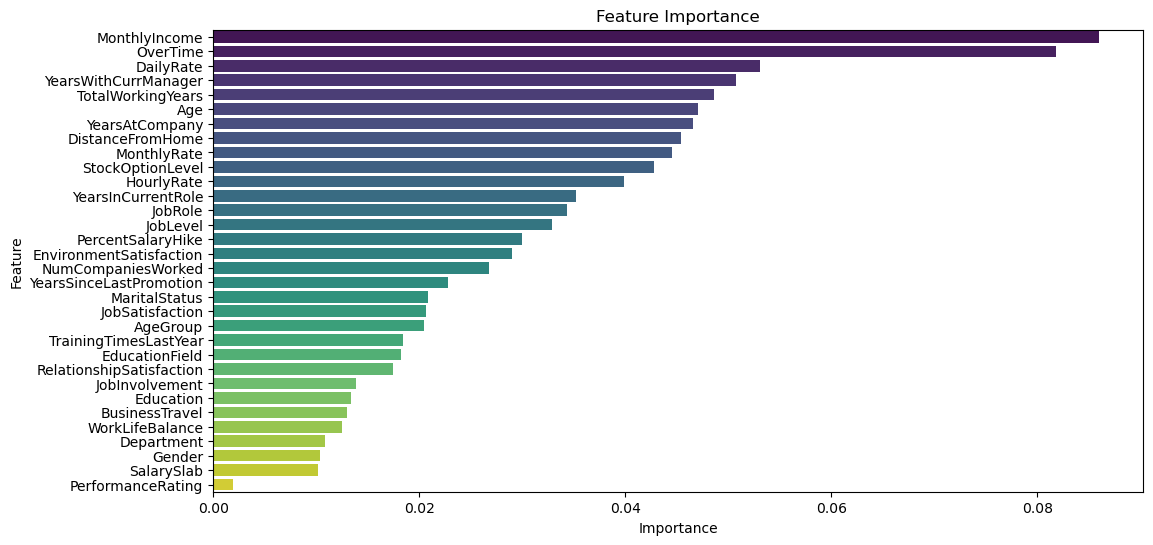

In [13]:
# Check Feature Importance
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances
feature_importances = clf.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x=importance_df['Importance'], y=importance_df['Feature'], palette='viridis')
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()